In [3]:
import torch 
import matplotlib.pyplot as plt

In [4]:
def create_linear_data(nums_data, if_plot= False):
    """
    Create data for linear model
    Args:
        nums_data: how many data points that wanted
    Returns:
        x with shape (nums_data, 1)
    """
    x = torch.linspace(0,1,nums_data)
    x = torch.unsqueeze(x,dim=1)
    k = 2
    y = k * x + torch.rand(x.size())
    
    if if_plot:
        plt.scatter(x.numpy(),y.numpy(),c=x.numpy())
        plt.show()
    data = {"x":x, "y":y}
    return data

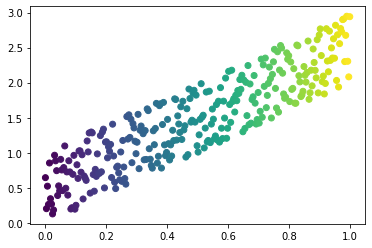

torch.Size([300, 1])


In [5]:
data = create_linear_data(300, if_plot=True)
print(data["x"].size())

In [6]:
class LinearRegression(torch.nn.Module):
    """
    Linear Regressoin Module, the input features and output 
    features are defaults both 1
    """
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1,1)
        
    def forward(self,x):
        out = self.linear(x)
        return out

In [7]:
linear = LinearRegression()
print(linear)

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [8]:
class Linear_Model():
    def __init__(self):
        """
        Initialize the Linear Model
        """
        self.learning_rate = 0.001
        self.epoches = 10000
        self.loss_function = torch.nn.MSELoss()
        self.create_model()
        
    def create_model(self):
        self.model = LinearRegression()
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate)
    
    def train(self, data, model_save_path="model.pth"):
        """
        Train the model and save the parameters
        Args:
            model_save_path: saved name of model
            data: (x, y) = data, and y = kx + b
        Returns: 
            None
        """
        x = data["x"]
        y = data["y"]
        for epoch in range(self.epoches):
            prediction = self.model(x)
            loss = self.loss_function(prediction, y)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            if epoch % 500 == 0:
                print("epoch: {}, loss is: {}".format(epoch, loss.item()))
        torch.save(self.model.state_dict(), "linear.pth")
      
        
    def test(self, x, model_path="linear.pth"):
        """
        Reload and test the model, plot the prediction
        Args:
            model_path: the model's path and name
            data: (x, y) = data, and y = kx + b
        Returns:
            None
        """
        x = data["x"]
        y = data["y"]
        self.model.load_state_dict(torch.load(model_path))
        prediction = self.model(x)
        
        plt.scatter(x.numpy(), y.numpy(), c=x.numpy())
        plt.plot(x.numpy(), prediction.detach().numpy(), color="r")
        plt.show()
        
    def compare_epoches(self, data):
        x = data["x"]
        y = data["y"]
        
        num_pictures = 16
        fig = plt.figure(figsize=(10,10))
        current_fig = 0
        for epoch in range(self.epoches):
            prediction = self.model(x)
            loss = self.loss_function(prediction, y)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            if epoch % (self.epoches/num_pictures) == 0:
                current_fig += 1
                plt.subplot(4, 4, current_fig)
                plt.scatter(x.numpy(), y.numpy(), c=x.numpy())
                plt.plot(x.numpy(), prediction.detach().numpy(), color="r")
        plt.show()

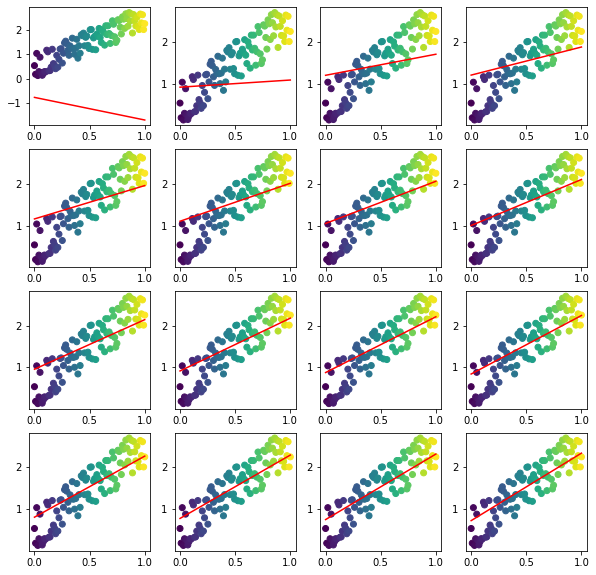

In [9]:
linear = Linear_Model()
data = create_linear_data(100)
# linear.train(data)
# linear.test(data)
linear.compare_epoches(data)